In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML, IFrame
InteractiveShell.ast_node_interactivity = "all"

## Manipuler des données géospatiales en Python

Les bibliothèques classiques permettant de manipuler des données géospatiales s'intègrent très bien aux IDE scientifiques (Spyder, Jupyter, etc.) et permettent de visualiser rapidement et interactivement des géométries ou un extrait d'une couche de données (attributs, géométries).

Les principales bibliothèques à connaitre sont les suivantes :

- [**shapely**](https://shapely.readthedocs.io/en/latest/index.html) : bindings GEOS pour Python *(équivalent R : __rgeos__)*
- [**geopandas**](http://geopandas.org/) : manipulation de données vecteur sous la forme lignes/colonnes (avec pandas) *(équivalent R : __sf__)*
- [**rasterio**](https://rasterio.readthedocs.io/en/latest/) : manipulation de données raster *(équivalent R : __raster__)*
- [**Rtree**](http://toblerity.org/rtree/) : création/interrogation d'un index spatial, bindings de libspatialindex *(équivalent R : **rtree** de **rgeos** )*


D'autres bibliothèques géospatiales sont également utilisables en Python : 

- [**GDAL/ogr**](https://pypi.org/project/GDAL/) : bindings autogénérés (SWIG), complets, performants, mais pas très "pythoniques"
- [**PyQGIS**](https://qgis.org/pyqgis/master/) : API Python du logiciel SIG QGIS (dans QGIS ou en standalone)
- [**ArcPy**](http://desktop.arcgis.com/fr/arcmap/latest/analyze/arcpy/what-is-arcpy-.htm): API Python du logicial SIG ArcGIS (dans ArcGIS ou en standalone)
- [**Grass**](https://grasswiki.osgeo.org/wiki/GRASS_Python_Scripting_Library) : API Python de la solution [GRASS](https://grass.osgeo.org/documentation/general-overview/)

### Se familiariser avec les types géométriques de base : Shapely

La bibliothèque **Shapely** se présente comme des bindings de haut niveau autour de la bibliothèque *GEOS*.

In [2]:
from shapely.geometry import Point, LineString, Polygon

In [3]:
#### Création d'un point à partir de coordonnées :
pt1 = Point(1.0, 1.0)
pt2 = Point(3.1, 2.4)

# On peut utiliser 3 coordonnées :
pt_3d = Point(1.0, 1.0, 3.0)

# Accéder aux coordonnées d'un objet de type Point :
coords = pt1.coords[0]
print("Coordonnées sous forme d'un tuple avec pt.coords[0] : {}".format(coords))

# Accéder seulement à la coordonnée en 'x' ou en 'y' :
pt_x = pt1.x
pt_y = pt1.y
print("pt.x -> {}\npt.y -> {}\n".format(pt_x, pt_y))

# La représentation de ces geometry (lors de l'appel de print par exemple)
# utilise la notation WKT :
print(pt1)

Coordonnées sous forme d'un tuple avec pt.coords[0] : (1.0, 1.0)
pt.x -> 1.0
pt.y -> 1.0

POINT (1 1)


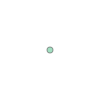

In [4]:
# Dans Spyder comme dans Jupyter on pourra afficher une représentation graphique
# de la géométrie en inscrivant le nom de la variable qui la contient dans l'interpréteur :
pt1

In [5]:
# Création d'une ligne à partir de plusieurs Point :
line = LineString([pt1, pt2])

# Création d'une ligne à partir de coordonnées : 
line = LineString([(1.0, 1.0), (3.1, 2.4), (5.8, 4.5)])

# Accéder à la séquence de coordonnées de la ligne
# (sous forme d'une liste de tuples) :
list_coords = list(line.coords)
print("Sous forme d'une liste de tuples :\n{}\n".format(list_coords))

# Accéder seulement aux valeurs en 'x' :
list_xs = list(line.coords.xy[0])
print("Récupération des 'x' de notre séquence de points :\n{}\n".format(list_xs))

# Accéder seulement aux valeurs en 'y' :
list_ys = list(line.coords.xy[1])
print("Récupération des 'y' de notre séquence de points :\n{}\n".format(list_ys))

Sous forme d'une liste de tuples :
[(1.0, 1.0), (3.1, 2.4), (5.8, 4.5)]

Récupération des 'x' de notre séquence de points :
[1.0, 3.1, 5.8]

Récupération des 'y' de notre séquence de points :
[1.0, 2.4, 4.5]



Polygon:


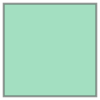

Polygon with hole:


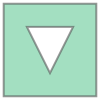

In [6]:
# Création d'un polygone à partir d'un seul anneau 
# (l'anneau externe)
poly1 = Polygon([(1., 1.), (1.2, 1.), (1.2, 1.2), (1., 1.2), (1., 1.)])

# Création d'un polygone à partir de plusieurs anneaux
# (l'anneau externe et un anneau représentant un trou)
poly_with_hole = Polygon(
    [(10., 10.), (12., 10.), (12., 12.), (10., 12.), (10., 10.)],
    [[(11., 10.5), (10.5, 11.5), (11.5, 11.5), (11., 10.5)]])

print('Polygon:')
poly1

print('Polygon with hole:')
poly_with_hole

In [7]:
# Imports relatifs aux géométries
# multi-parties
from shapely.geometry import (
    MultiPoint, MultiLineString,
    MultiPolygon, GeometryCollection,
)

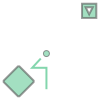

In [8]:
multipoint1 = MultiPoint([
    Point(1.1, 1.2),
    Point(8.0, 2.0),
    Point(9.5, 9.5),
])

multipoint2 = MultiPoint([(1.1, 1.2), (8.0, 2.0), (9.5, 9.5)])

multiline = MultiLineString([
    LineString([(12.1, 5.6), (4.5, 3.0)]),
    LineString([(117.1, 12.6), (30.5, 46.0)]),
    LineString([(0., 0.), (3., 3.)])
])

multipoly = MultiPolygon([poly1.buffer(2, 1), poly_with_hole])

collec = GeometryCollection([
    Point(5., 5.),
    LineString([(4.2, 4.3), (3., 3.), (5., 3.), (5., 0.,)]),
    multipoly,
])

collec

### Les méthodes associées à ces objets :

In [9]:
# Des méthodes correspondants à des prédicats spatiaux :
poly1.contains(pt1)
multiline.intersects(poly1)
multipoint1.equals(multipoint2)

# Des propriétés :
poly1.boundary.is_closed
poly1.is_closed
poly1.area
poly1.intersects(poly_with_hole)
poly_with_hole.area

False

True

True

True

False

0.03999999999999998

False

3.5

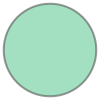

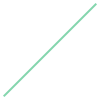

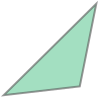

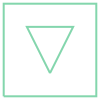

In [10]:
# Des méthodes qui permettent d'obtenir de nouvelles géométries :
pt1.buffer(10)
multiline.intersection(poly1)

# Des... propriétés qui permettent d'obtenir de nouvelles géométries :
multipoint1.convex_hull
poly_with_hole.boundary

Ce sont ces objets qu'on va manipuler dans la colonne `geometry` avec **geopandas** par la suite.
On retrouvera les attributs de ces objets sur cette colonne, avec pour signification d'appliquer l'opération à la géométrie de chaque entité.

### geopandas

Ouverture d'une couche de données avec geopandas :

In [11]:
# Import nécessaires:
# Geopandas et les bibliothèques vues précédemment :
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


gdf = gpd.read_file('data/COURS_D_EAU.shp')

# L'objet est de type `GeoDataFrame` et
# possède les méthodes des `DataFrame` ainsi que d'autres :
gdf.head()

,ID,CODE_HYDRO,TOPONYME,IMPORTANCE,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,SOURCE,ID_SOURCE,STATUT,MAREE,PERMANENT,STATUT_TOP,COMMENT,geometry
0,COURDEAU0000000013199566,None,le Gier,4,2006-08-18 12:13:50,2018-07-06 14:53:45,None,None,None,None,None,None,None,Validé,None,"(LINESTRING (823137.8 6477831.7, 823134.4 6477..."
1,COURDEAU0000000013199499,None,le Garon,5,2006-08-18 12:13:50,2018-07-06 14:53:45,None,None,None,None,None,None,None,Validé,None,"(LINESTRING (821856.7 6512492.6, 821865.9 6512..."
2,COURDEAU0000000012012955,None,la Valencize,5,2006-08-16 12:14:40,2018-07-06 14:53:45,None,None,None,None,None,None,None,Validé,None,"LINESTRING (828022.2 6484036.4, 828031.8 64840..."
3,COURDEAU0000000013199545,None,le Mornantet,5,2006-08-18 12:13:50,2018-07-06 14:53:45,None,None,None,None,None,None,None,Validé,None,"(LINESTRING (828867.2 6504625.2, 828874 650462..."
4,COURDEAU0000002000804457,06C0000002000804457,le Rhône,5,2017-01-24 16:06:18,2018-02-23 12:57:41,None,None,None,None,Validé,None,None,Collecté,None,"(LINESTRING (839675.7 6315441.7, 839443.9 6314..."


In [12]:
# Attribut propre aux `GeoDataFrame` :
gdf.crs

{'proj': 'lcc',
 'lat_1': 49,
 'lat_2': 44,
 'lat_0': 46.5,
 'lon_0': 3,
 'x_0': 700000,
 'y_0': 6600000,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

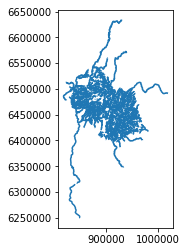

In [13]:
# Attributs dont le comportement a été modifié par rapport aux DataFrame :
gdf.plot()

On dispose d'une colonne `geometry`. Lors de l'affichage de la table comme précédemment on a vu sa représentation au format WKT mais en interne il s'agit de géometries de la bibliothèque `shapely`.

Comme avec pandas, on peut sélectionner les colonnes avec la notation entre crochets et sélectionner des entités avec les méthodes `.loc`, `.iloc` ou en vérifiant une condition.

In [14]:
# Affichage de seulement quelques colonnes :
gdf[['TOPONYME', 'IMPORTANCE']].head()

,TOPONYME,IMPORTANCE
0,le Gier,4
1,le Garon,5
2,la Valencize,5
3,le Mornantet,5
4,le Rhône,5


In [15]:
# Affichage de seulement quelques colonnes
# pour les cours d'eau dont l'importance est supérieure ou égale à 4:
gdf[gdf.IMPORTANCE >= 4][['TOPONYME', 'geometry']].head()

TypeError: '>=' not supported between instances of 'str' and 'int'

#### Lecture du message d'erreur et analyse du pbm ...

In [ ]:
# Conversion explicite de type
gdf.IMPORTANCE = gdf.IMPORTANCE.astype(int)

# Retour à l'opération demandée
gdf[gdf.IMPORTANCE >= 4][['TOPONYME', 'geometry']].head()

In [ ]:
# Obtention d'une Serie contenant les longueurs de cours d'eau 
lengths = gdf.geometry.length
lengths.sort_values(ascending=False).head() # <- tri effectué et ID conservés

In [ ]:
# Utilisons ces indexes triés pour appeler notre GeoDataFrame
# et obtenir les toponymes triés par la taille du cours d'eau :
gdf.loc[lengths.sort_values(ascending=False).index][['TOPONYME']]

In [16]:
gdf[gdf.TOPONYME == 'Canal du Furon'].index

Int64Index([735], dtype='int64')

In [17]:
geom = gdf.loc[(735, 'geometry')]

<class 'shapely.geometry.linestring.LineString'>


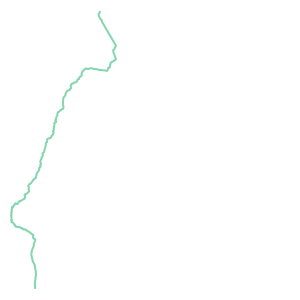

In [18]:
print(type(geom))
geom

In [19]:
print('Longueur: {:.1f}m'.format(geom.length))

Longueur: 21416.3m


## Ouverture d'un fichier raster avec rasterio :

In [20]:
import rasterio as rio

mnt = rio.open('data/N245E395.tif')
print(mnt.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 2000, 'height': 2000, 'count': 1, 'crs': CRS({'proj': 'laea', 'lat_0': 52, 'lon_0': 10, 'x_0': 4321000, 'y_0': 3210000, 'ellps': 'GRS80', 'towgs84': '0,0,0,0,0,0,0', 'units': 'm', 'no_defs': True}), 'transform': Affine(25.0, 0.0, 3950000.0,
       0.0, -25.0, 2500000.0)}


#### La projection ne correspond pas, on va reprojeter le fichier raster

In [21]:
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show


dst_crs = 'EPSG:2154' # Lambert 93

transform, width, height = calculate_default_transform(
    mnt.crs, dst_crs, mnt.width, mnt.height, *mnt.bounds)
kwargs = mnt.meta.copy()
kwargs.update({
    'crs': dst_crs,
    'transform': transform,
    'width': width,
    'height': height
})

with rio.open('data/N245E395_L93.tif', 'w', **kwargs) as dst:
    reproject(
        source=rio.band(mnt, 1),
        destination=rio.band(dst, 1),
        src_transform=mnt.transform,
        src_crs=mnt.crs,
        dst_transform=transform,
        dst_crs=dst_crs,
        resampling=Resampling.nearest,
    )

mnt.close()

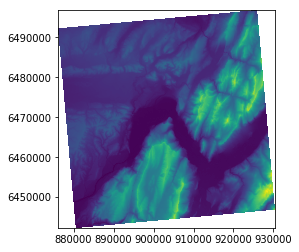

In [22]:
mnt = rio.open('data/N245E395_L93.tif')
show(mnt)

Les deux bibliothèques donnent accès à leurs éléments (géométries d'une part et valeurs du raster d'autre part) sous forme d'objet Python. On va donc facilement pouvoir interagir entre les objets de ces bibliothèques.

**Exemple** : Création du profil en long d'un cours d'eau à partir du tracé précédement extrait et du mnt reprojeté.

La procédure est relativement simple à expliquer :
- définir une distance entre nos points de relevé (ici on prend arbitrairement 50 points)
- créer des points le long du cours d'eau en utilisant cette distance
- récupérer l'altitude de chacun de ces points
- créer un graphique avec en absisse la distance à la source et en ordonnées l'altitude

In [23]:
# geom est la géométrie récupérée plus tôt
length = geom.length

# combien de points :
nb_points = 50 

# quelle distance entre les points :
step = geom.length / nb_points

dists = []
coords = []
for dist in range(0, int(length), int(step)):
    pt = geom.interpolate(dist) # type(pt) -> shapely.geometry.Point
    # récupération des coordonnées du points sous forme d'un tuple :
    c = pt.coords[0]
    coords.append(c)
    dists.append(dist)

result = []
for i, value in enumerate(mnt.sample(coords)):
    result.append((dists[i], value[0]))

On peut maintenant utiliser ces valeurs pour créer un graphique avec `matplotlib`:

Text(0.5,1,'Profil en long du Canal du Furon')

Text(0.5,0,'Distance à la source')

Text(0,0.5,'Altitude')

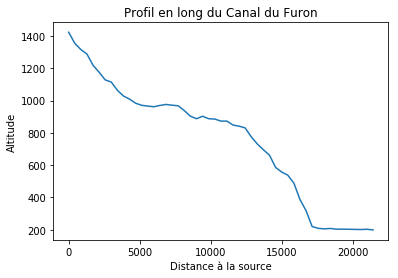

In [24]:
plt.plot([i[0] for i in result], [i[1] for i in result])
plt.title('Profil en long du Canal du Furon')
plt.xlabel('Distance à la source')
plt.ylabel('Altitude')
plt.show()

Et si on voulait créer une couche de points (où chaque entité serait un de ces points), avec un champ contenant la distance à la source, un champ contenant le toponyme du cours d'eau et un champ contenant l'altitude du point ?

Cette couche va être créée sous forme d'un nouvel objet `geopandas` et va ensuite être sauvegardée au format GeoJSON.

In [25]:
result = {}
result['geometry'] = []
result['distance_source'] = []
result['altitude'] = []

for dist in range(0, int(length), int(step)):
    pt = geom.interpolate(dist)
    result['geometry'].append(pt) 
    result['distance_source'].append(dist)
    altitude = list(mnt.sample(pt.coords))[0][0]
    result['altitude'].append(altitude)

# Comme avec pandas on peut utiliser un dictionnaire dont les clés sont
# les nom de colonnes et les valeurs associées représentent
# les valeurs des entités de ces colonnes
new_gdf = gpd.GeoDataFrame(result, crs=gdf.crs)

# Toutes nos nouvelles entités vont prendre cette valeur
new_gdf['TOPONYME_COURS_DEAU'] = 'Canal du Furon'
new_gdf.head()

,geometry,distance_source,altitude,TOPONYME_COURS_DEAU
0,POINT (904717.4 6447571.2),0,1423.304810,Canal du Furon
1,POINT (904696.944100579 6447996.848641824),428,1354.772339,Canal du Furon
2,POINT (904755.9720668748 6448415.456500354),856,1316.247681,Canal du Furon
3,POINT (904703.2014671427 6448834.856722699),1284,1288.363037,Canal du Furon
4,POINT (904552.2122605438 6449229.864593551),1712,1219.130859,Canal du Furon


In [26]:
result = []

for dist in range(0, int(length), int(step)):
    pt = geom.interpolate(dist)
    result.append({
        "geometry": pt,
        "distance_source": dist,
        "altitude": list(mnt.sample(pt.coords))[0][0],
    })

# Cette fois nous avons utilisé une liste
# contenant un dictionnaire pour chaque entité
# ... le résultat est le même qu'avec la méthode prédécente
new_gdf = gpd.GeoDataFrame(result, crs=gdf.crs)

# Toutes nos nouvelles entités vont prendre cette valeur
new_gdf['TOPONYME_COURS_DEAU'] = 'Canal du Furon'
new_gdf.head()

,altitude,distance_source,geometry,TOPONYME_COURS_DEAU
0,1423.304810,0,POINT (904717.4 6447571.2),Canal du Furon
1,1354.772339,428,POINT (904696.944100579 6447996.848641824),Canal du Furon
2,1316.247681,856,POINT (904755.9720668748 6448415.456500354),Canal du Furon
3,1288.363037,1284,POINT (904703.2014671427 6448834.856722699),Canal du Furon
4,1219.130859,1712,POINT (904552.2122605438 6449229.864593551),Canal du Furon


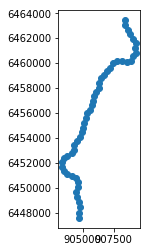

In [27]:
new_gdf.plot()

### Enregistrement du résultat


Transformation des géometries en coordonnées géographiques (EPSG:4326) avant d'enregistrer le fichier au format GeoJSON :

In [28]:
rm data/points_canal_furon.geojson

In [29]:
new_gdf.to_crs(epsg=4326).to_file('data/points_canal_furon.geojson', driver='GeoJSON')

In [30]:
%cat data/points_canal_furon.geojson

{
"type": "FeatureCollection",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": [
{ "type": "Feature", "properties": { "altitude": 1423.3048095703125, "distance_source": 0, "TOPONYME_COURS_DEAU": "Canal du Furon" }, "geometry": { "type": "Point", "coordinates": [ 5.602936388562156, 45.097041248809695 ] } },
{ "type": "Feature", "properties": { "altitude": 1354.7723388671875, "distance_source": 428, "TOPONYME_COURS_DEAU": "Canal du Furon" }, "geometry": { "type": "Point", "coordinates": [ 5.602854817807447, 45.100877769687337 ] } },
{ "type": "Feature", "properties": { "altitude": 1316.2476806640625, "distance_source": 856, "TOPONYME_COURS_DEAU": "Canal du Furon" }, "geometry": { "type": "Point", "coordinates": [ 5.60378031054364, 45.104627343059519 ] } },
{ "type": "Feature", "properties": { "altitude": 1288.363037109375, "distance_source": 1284, "TOPONYME_COURS_DEAU": "Canal du Furon" }, "geometry": { "type": "Point", "coordinates": [ 5

### Plus de manipulations géospatiales avec geopandas

On a vu que geopandas permettait de manipuler les données sous la même forme que pandas (lignes / colonnes). Cette possibilité va pouvoir être utilisée pour appliquer des opérations à l'ensemble de la colonne `geometry`.

On peut par exemple créer un buffer autour de chaque point de la manière suivante :

In [31]:
# On peut appeler la méthode sur l'ensemble de l'objet ou seulement sur sa colonne geometry, le résultat est le même
# Dans les deux cas c'est une GeoSeries (une colonne et un index) qui est renvoyée :

new_gdf.buffer(100).head()

print('new_gdf.buffer(100) == new_gdf.geometry.buffer(100) -> {}'
      .format(np.all(new_gdf.buffer(10) == new_gdf.geometry.buffer(10))))

0    POLYGON ((904817.4 6447571.2, 904816.918472667...
1    POLYGON ((904796.944100579 6447996.848641824, ...
2    POLYGON ((904855.9720668748 6448415.456500354,...
3    POLYGON ((904803.2014671427 6448834.856722699,...
4    POLYGON ((904652.2122605438 6449229.864593551,...
dtype: object

new_gdf.buffer(100) == new_gdf.geometry.buffer(100) -> True


On peut utiliser cette colonne pour remplacer la colonne de géométries qui contient nos points :

In [32]:
new_gdf.geometry = new_gdf.geometry.buffer(100)

In [33]:
new_gdf.head()
new_gdf.tail()

,altitude,distance_source,geometry,TOPONYME_COURS_DEAU
0,1423.304810,0,"POLYGON ((904817.4 6447571.2, 904816.918472667...",Canal du Furon
1,1354.772339,428,"POLYGON ((904796.944100579 6447996.848641824, ...",Canal du Furon
2,1316.247681,856,"POLYGON ((904855.9720668748 6448415.456500354,...",Canal du Furon
3,1288.363037,1284,"POLYGON ((904803.2014671427 6448834.856722699,...",Canal du Furon
4,1219.130859,1712,"POLYGON ((904652.2122605438 6449229.864593551,...",Canal du Furon


,altitude,distance_source,geometry,TOPONYME_COURS_DEAU
46,202.930374,19688,"POLYGON ((909146.8996321146 6461947.770264197,...",Canal du Furon
47,202.041183,20116,"POLYGON ((908930.9023242079 6462317.26292893, ...",Canal du Furon
48,201.225372,20544,"POLYGON ((908715.1445422065 6462686.893849844,...",Canal du Furon
49,202.919891,20972,"POLYGON ((908511.1915707089 6463048.839004138,...",Canal du Furon
50,198.850189,21400,"POLYGON ((908514.1746335384 6463431.775548101,...",Canal du Furon


#### Plus de manipulations géospatiales avec geopandas (suite)

In [34]:
# Ouverture de la couche des communes de la région Auvergne-Rhône-Alpes
comm = gpd.read_file('data/COMMUNE_auvergne_rhone_alpes.shp')

# Le système de coordonnées est le même que nos cours d'eau
assert comm.crs == gdf.crs

,NOM_DEPT,geometry,SUPERFICIE,POPULATION
0,AIN,"POLYGON ((858243.4999999506 6525232.500001915,...",563065,619497
1,ALLIER,"POLYGON ((652774.0000000136 6581522.800001746,...",732174,343431
2,ARDECHE,"POLYGON ((802759.7999999614 6358170.900002372,...",556048,320379
3,CANTAL,"POLYGON ((696976.8000000011 6395040.500002271,...",568153,147035


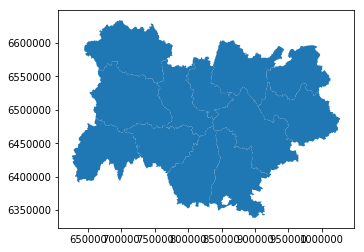

In [35]:
# Aggrégation / fusion des communes en départements
# On choisit les colonnes à conserver, la colonne à utiliser
# pour l'aggrégation, et une fonction d'aggrégation si besoin
dep = comm[['geometry', 'NOM_DEPT', 'SUPERFICIE', 'POPULATION']].dissolve(by='NOM_DEPT', aggfunc='sum')
dep.reset_index(drop=False, inplace=True)

# Affichage du résultat
dep.head(4)
dep.plot()

In [36]:
geom_furon = gdf.loc[gdf.TOPONYME == 'Canal du Furon', 'geometry'].values[0]

# Quelles sont les communes traversées par le Canal du Furon ?
comm[comm.intersects(geom_furon.buffer(1000))]

,ID_GEOFLA,CODE_COM,INSEE_COM,NOM_COM,STATUT,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,Y_CENTROID,Z_MOYEN,SUPERFICIE,POPULATION,CODE_ARR,CODE_DEPT,NOM_DEPT,CODE_REG,NOM_REG,geometry
699,COMMUNE00000000000006293,170,38170,FONTANIL-CORNILLON,Commune simple,909029,6465315,908960,6465457,329,536,2780,1,38,ISERE,84,AUVERGNE-RHONE-ALPES,"POLYGON ((907028.2999999302 6465155.500002086,..."
900,COMMUNE00000000000008005,474,38474,SASSENAGE,Commune simple,909188,6459715,907910,6460927,434,1329,11705,1,38,ISERE,84,AUVERGNE-RHONE-ALPES,"POLYGON ((911008.8999999284 6459848.200002102,..."
1260,COMMUNE00000000000010930,205,38205,LANS-EN-VERCORS,Commune simple,903471,6450984,903301,6448974,1194,3914,2613,1,38,ISERE,84,AUVERGNE-RHONE-ALPES,"POLYGON ((902581.4999999308 6453999.000002118,..."
2203,COMMUNE00000000000019696,382,38382,SAINT-EGREVE,Commune simple,910499,6462717,910635,6462909,345,1086,15996,1,38,ISERE,84,AUVERGNE-RHONE-ALPES,"POLYGON ((910420.6999999286 6460691.5000021, 9..."
2415,COMMUNE00000000000021454,153,38153,ENGINS,Commune simple,905491,6456924,905165,6458778,1301,2091,496,1,38,ISERE,84,AUVERGNE-RHONE-ALPES,"POLYGON ((903819.699999931 6462879.200002093, ..."
3184,COMMUNE00000000000027701,281,38281,NOYAREY,Commune simple,906419,6463915,905506,6463960,602,1701,2269,1,38,ISERE,84,AUVERGNE-RHONE-ALPES,"POLYGON ((907028.2999999302 6465155.500002086,..."
3297,COMMUNE00000000000028626,185,38185,GRENOBLE,Préfecture de département,914070,6457870,913890,6457937,216,1854,160215,1,38,ISERE,84,AUVERGNE-RHONE-ALPES,"POLYGON ((911008.8999999284 6459848.200002102,..."
3680,COMMUNE00000000000031965,433,38433,SAINT-NIZIER-DU-MOUCHEROTTE,Commune simple,906593,6455847,906956,6455498,1216,1136,1108,1,38,ISERE,84,AUVERGNE-RHONE-ALPES,"POLYGON ((905111.3999999298 6453557.70000212, ..."


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


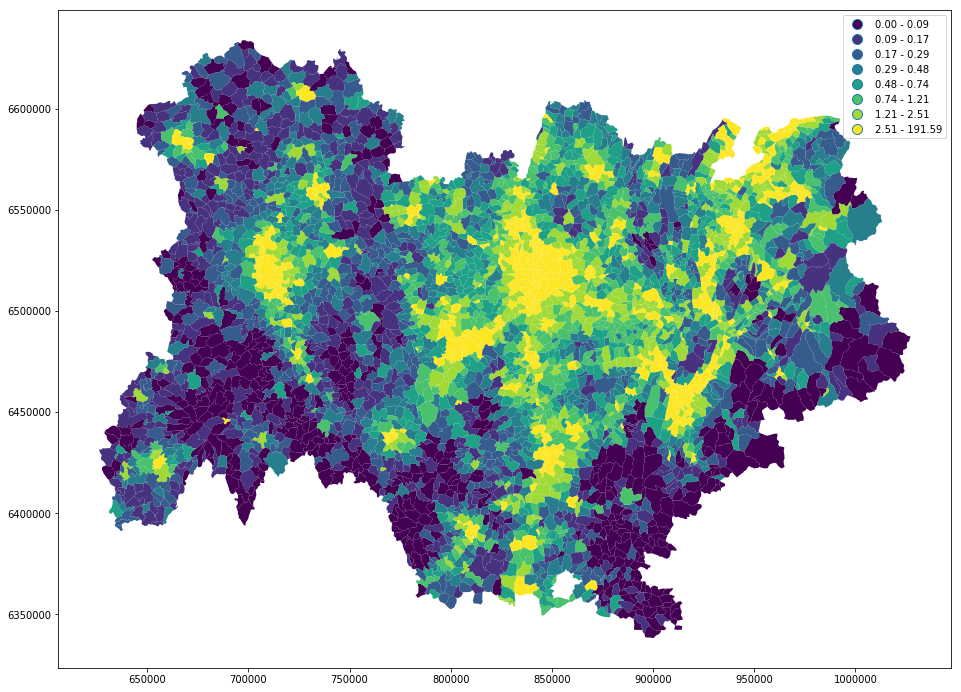

In [37]:
# Calculer la densité de population sur la couche des communes :
comm['DENSITE_POPULATION'] = comm['POPULATION'] / comm['SUPERFICIE']

comm.plot('DENSITE_POPULATION', scheme='Quantiles', k=8, figsize=(16,16), legend=True)

##### Attention geopandas ne dispose toutefois pas de 'vrais' fonctionnalités 'carto' et il existe des bibliothèques qui offrent une API dédiée à la cartographie en Python.

##### Sans se plonger dans la cartographie thématique, on note qu'il est facilement possible des faire des cartes choroplètes (avec geopandas, ou folium ensuite par exemple) ou des cartes de symboles proportionnels avec quelques opérations supplémentaires.

#### Affichage de nos 50 buffer sur un fond `Leaflet` :

In [40]:
import folium
from pyproj import Proj, transform

# On va récupérer les coordonnées du centroide du cours d'eau pour centrer la carte
# (on doit transformer ces coordonnées du Lambert 93 vers des coordonnées en latitude-longitude)
c = geom.centroid.xy
x,y = transform(Proj(init="epsg:2154"), Proj(init="epsg:4326"), c[0][0], c[1][0])

# On instancie un objet Map avec le fond de notre choix
# et on lui ajoute direction nos entitées polygonales:
map_example = folium.Map(
    location=(y, x),
    tiles = "Stamen Toner",
    zoom_start = 11).add_child(
        folium.features.GeoJson(new_gdf.to_crs(epsg='4326').to_json()))

In [41]:
# Export du document HTML
map_example.save('tmp/plot_data.html')
# Affichage dans IPython 
IFrame('tmp/plot_data.html', width="700px", height="400px")

Dans la partie suivante nous verrons comment créer une page réactive utilisant des données coté serveur ainsi qu'une solution rapide pour exposer une API réalisant des calculs personnalisés par exemple.  

Bien que ça ne soit pas le cas dans les exemples suivants, il est possible d'intégrer des données géo-spatiales dans développements web comme ceux qui vont suivre.

### Partie suivante ...

#### 7. [Publication sur le web](web.slides.html)